0


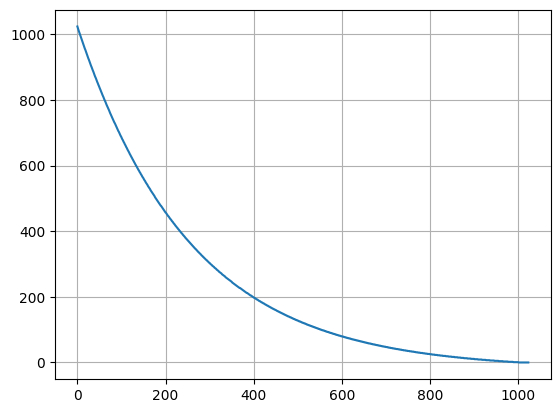

#pragma once
#include <Arduino.h>
const uint16_t decayCurveSize = 1024; 
const uint16_t decayCurve[1024] = {
1024,1019,1015,1011,1007,1003,999,995,991,987,984,980,976,972,968,964,
960,956,953,949,945,941,938,934,930,926,923,919,915,912,908,904,
901,897,894,890,887,883,879,876,872,869,866,862,859,855,852,848,
845,842,838,835,832,828,825,822,818,815,812,809,805,802,799,796,
793,789,786,783,780,777,774,771,768,764,761,758,755,752,749,746,
743,740,737,734,731,729,726,723,720,717,714,711,708,705,703,700,
697,694,691,689,686,683,680,678,675,672,670,667,664,662,659,656,
654,651,648,646,643,641,638,635,633,630,628,625,623,620,618,615,
613,610,608,605,603,600,598,596,593,591,588,586,584,581,579,577,
574,572,570,567,565,563,561,558,556,554,552,549,547,545,543,541,
538,536,534,532,530,528,525,523,521,519,517,515,513,511,509,507,
504,502,500,498,496,494,492,490,488,486,484,482,480,478,477,475,
473,471,469,467,465,463,461,459,457,456,454,452,450,448,446,445,
443,441,439,437,436,434,432,430,429,427,

In [9]:
import os
import numpy as np
import pprint
import matplotlib.pyplot as plt
import math

# decay
_maxLevel = 1024
_sustain = -20
_decay = 1024
data = []
for i in range(_decay):
    _level = int((math.exp(-1 * i * (4 / _decay)) * (_maxLevel - _sustain)) + _sustain)
    data.append(_level)
print(data[-1])
plt.plot(data)
plt.grid(True)
plt.show()

# 16個ずつ改行するのに変換
c_array = []
for i in range(0, len(data), 16):
    c_array.append(",".join(map(str, data[i:i+16])))


filename = 'decayCurve'
txt = '#pragma once\n'
txt += '#include <Arduino.h>\n'
txt += f'const uint16_t {filename}Size = {_decay}; \n'
txt += f'const uint16_t {filename}[{_decay}] = ' + '{\n'
txt += ',\n'.join(c_array)
txt += '};\n'
# with open(f"{filename}.h", "w") as f:
#     f.write(txt)

print(txt)
